### Vehicle Project Steps

1) Import all of the libraries you need, upload the dataset and read it in.

2) Conduct a good Exploratory Data Analysis, understanding the data both visually and numerically.

3)Prepare your data for future modelling by normalizing and standardizing its columns. Also, don’t forget to divide the dataset into subsets (for training and testing purposes) at this stage!

4) Check if dimensionality reduction makes a difference here. If it possible to reduce the number of dimensions from original 18 to a lower number while preserving the variance in the data, don’t hesitate to do it. PCA is great algo for this purpose!

5) Try solving classification problem “Prospect Auto” asked you to address from two different perspectives: first, using a supervised classification approach or via unsupervised-based clustering way. Compare the approaches by calculating relevant metrics.

In [ ]:
# 1) Import all of the libraries you need, upload the dataset and read it in.

# 1.1)Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# 1.2) Loading the vehicle dataset
vehicle = pd.read_csv('vehicle.csv')

In [ ]:
vehicle['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [ ]:
# 2) Conduct a good Exploratory Data Analysis, understanding the data both numerically and visually.
# 2.1) understanding the data numerically.
vehicle.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [ ]:
# 2.1) understanding the data numerically.
vehicle.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
# 2.1) understanding the data numerically.
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

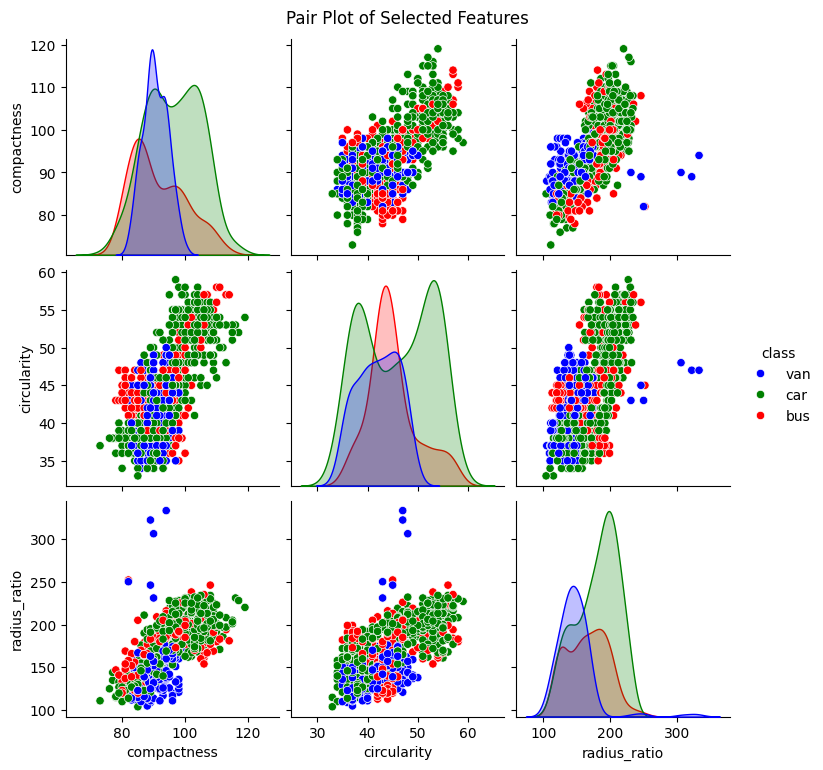

In [ ]:
# 2.2) understanding the data visualy.
# Pair plot of 3 features
# Colors
palette = {'bus': 'red', 'van': 'blue', 'car': 'green'}

sns.pairplot(vehicle, vars=['compactness', 'circularity', 'radius_ratio'], hue='class', diag_kind='kde', palette=palette)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

### It can be observed that the data is quite compact and that it is somehow grouped by class, but the data must be prepared.

<ipython-input-9-8dff43173277>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='compactness', data=vehicle, palette=palette)


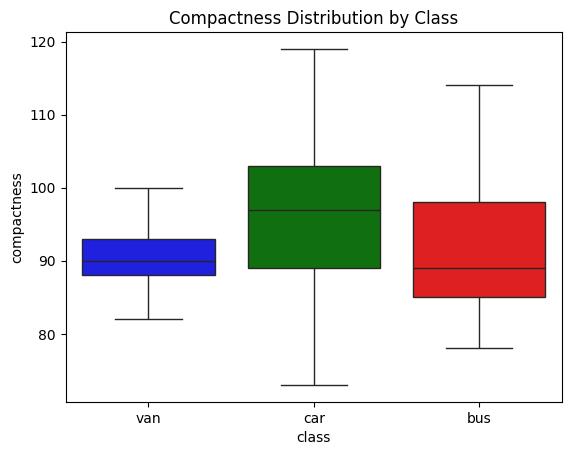

<ipython-input-9-8dff43173277>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='circularity', data=vehicle, palette=palette)


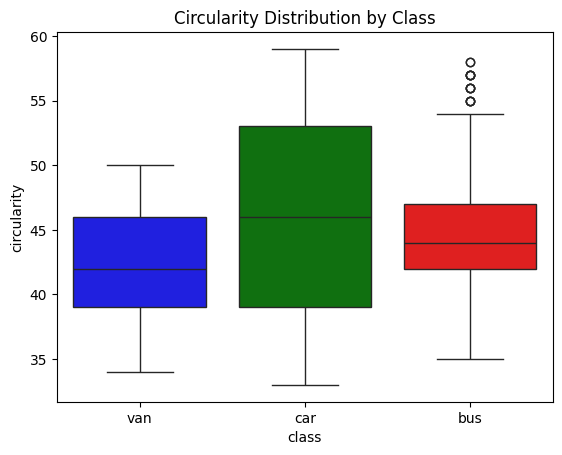

In [ ]:
# 2.2) understanding the data visualy.

# Colors
palette = {'bus': 'red', 'van': 'blue', 'car': 'green'}

# Boxplot for compactness by class
sns.boxplot(x='class', y='compactness', data=vehicle, palette=palette)
plt.title('Compactness Distribution by Class')
plt.show()

# Boxplot for circularity by class
sns.boxplot(x='class', y='circularity', data=vehicle, palette=palette)
plt.title('Circularity Distribution by Class')
plt.show()

###We can observe that some outliers are observed in the bus data

<ipython-input-10-784b56088a34>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=vehicle, palette=palette)


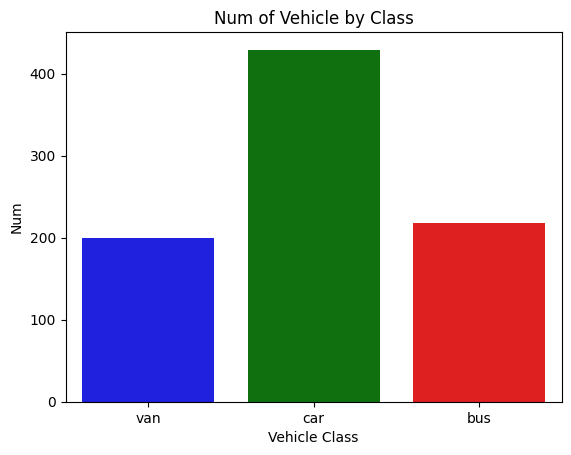

In [ ]:
# 2.2) understanding the data visualy.

# Colors
palette = {'bus': 'red', 'van': 'blue', 'car': 'green'}

# Bar graph
sns.countplot(x='class', data=vehicle, palette=palette)
plt.title('Num of Vehicle by Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Num')
plt.show()

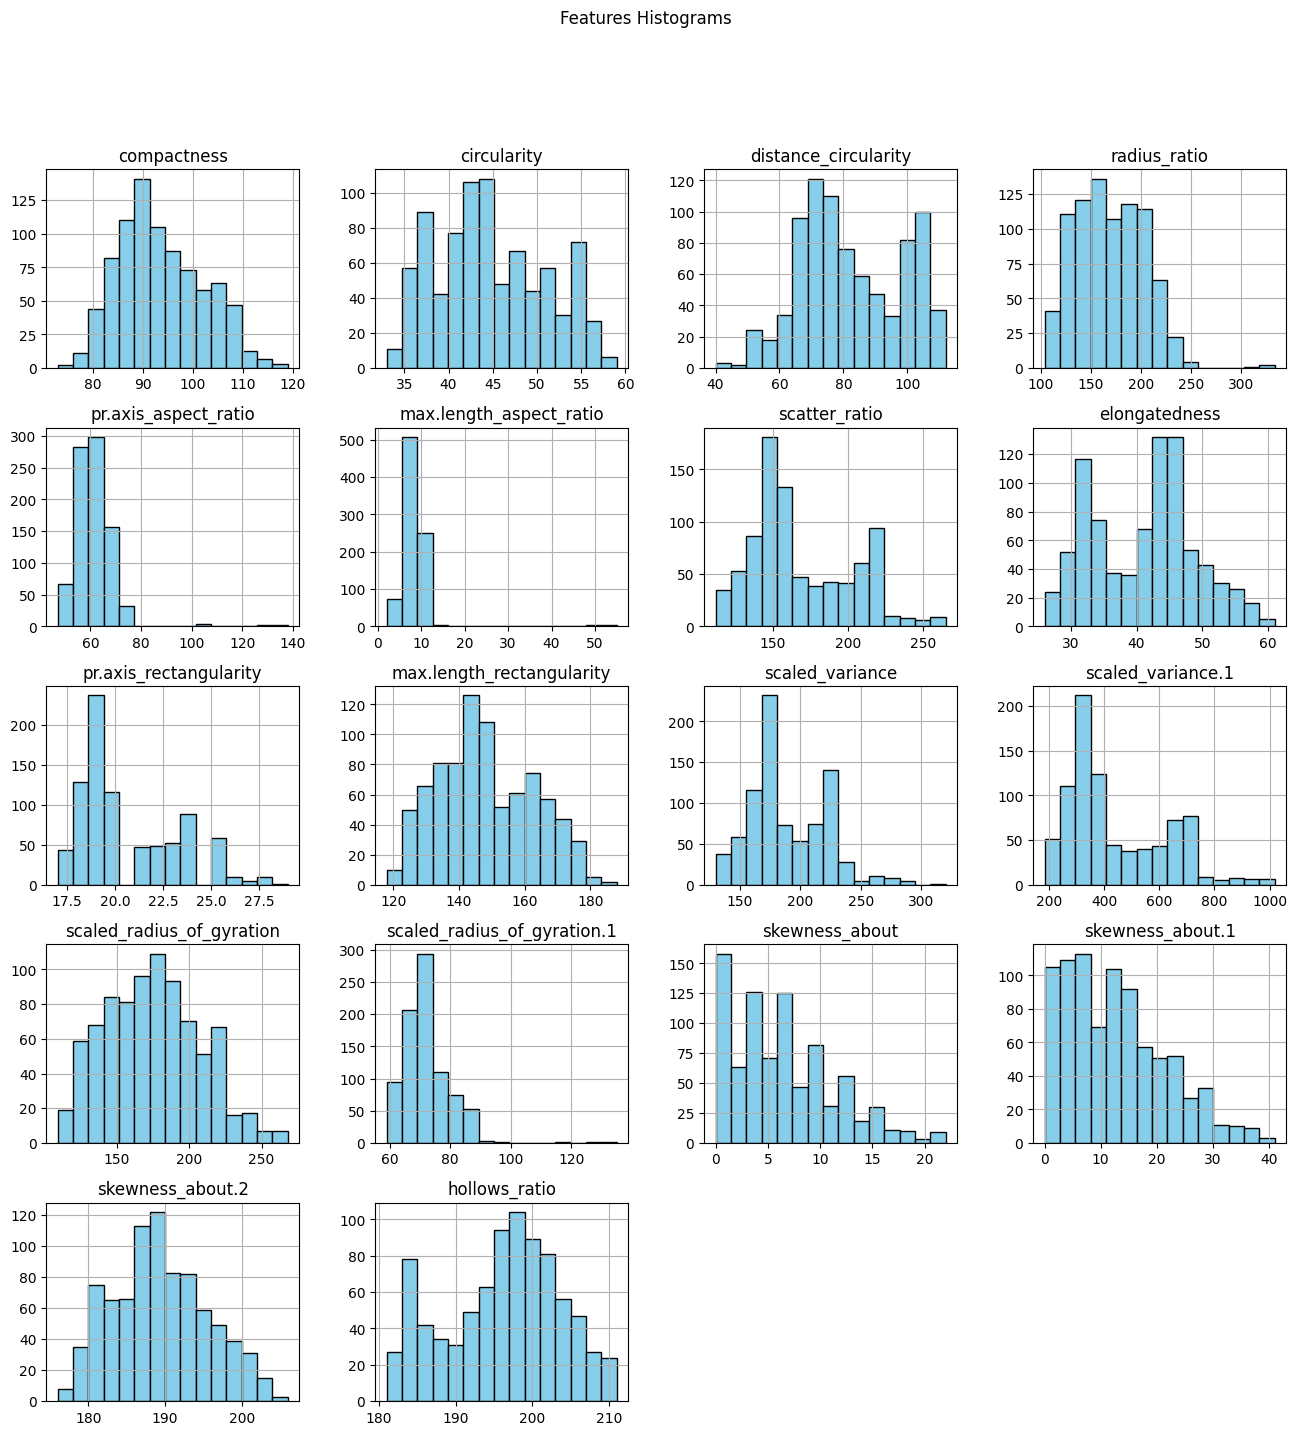

In [ ]:
# 2.2) understanding the data visualy.
# Some histograms
vehicle.hist(figsize=(16, 16), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Features Histograms')
plt.show()

# Some features looks normalized, some Skewed and some with outliners

###3)Prepare data for modelling by normalizing and standardizing its columns.

In [ ]:
# Checing data for null values
nulls_check = vehicle.isnull().sum()
print(nulls_check)

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [ ]:
# Handle missing values, fill nulls with mean values

numeric_columns = vehicle.select_dtypes(include=['number']).columns
vehicle[numeric_columns] = vehicle[numeric_columns].fillna(vehicle[numeric_columns].mean())

In [ ]:
# Checing again data for null values
nulls_check2 = vehicle.isnull().sum()
print(nulls_check2)

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [ ]:
# Convert 'class' column to categorical and get the mapping
vehicle['class'] = vehicle['class'].astype('category')
class_mapping = dict(enumerate(vehicle['class'].cat.categories))
print("Número asignado a cada clase:")
print(class_mapping)

Número asignado a cada clase:
{0: 'bus', 1: 'car', 2: 'van'}


In [ ]:
# Changing class column to numbers category
vehicle['class'] = vehicle['class'].astype('category').cat.codes
vehicle['class'].head()

,class
0,2
1,2
2,1
3,2
4,0


In [ ]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [ ]:
# 3) Data normalizing, standardizing and spliting in test/train sets

# Separate features (X) and target (y)
X = vehicle.drop(columns=['class'])  # Exclude 'class' column
y = vehicle['class']  # Class column

# Normalizing the data
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

# Standardizing data
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42)

X_train_std, X_test_std, _, _ = train_test_split(
    X_standardized, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print(f"Training Set (Normalized): {X_train_norm.shape}")
print(f"Testing Set (Normalized): {X_test_norm.shape}")
print(f"Training Set (Standardized): {X_train_std.shape}")
print(f"Testing Set (Standardized): {X_test_std.shape}")

Training Set (Normalized): (676, 18)
Testing Set (Normalized): (170, 18)
Training Set (Standardized): (676, 18)
Testing Set (Standardized): (170, 18)


In [ ]:
# Encode target variable
# 0:van 1:car, 2:bus
vehicle['class'] = vehicle['class'].astype('category').cat.codes
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [ ]:
vehicle.shape

(846, 19)

### 4) Checking dimensionality reduction



It is possible to reduce the number of dimensions from original 18 to 6  preserving the variance (95%) in the data.

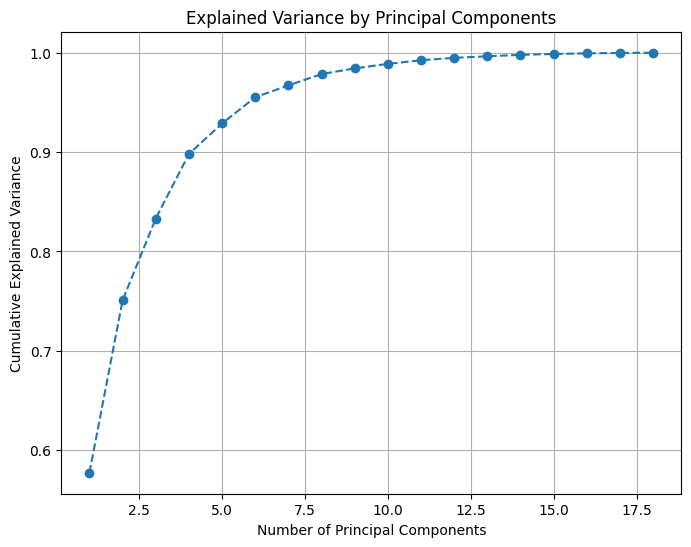

Number of components explaining 95% variance: 6
Shape of original dataset: (846, 18)
Shape of reduced dataset: (846, 6)


In [ ]:
# Apply PCA to check dimensionality reduction

pca = PCA()
X_pca = pca.fit_transform(X_normalized)

# Explained variance ratio (percentage of variance explained by each principal component)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Reducing the dataset
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # 95% variance
print(f"Number of components explaining 95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(X_normalized)

# Shape of the reduced dataset
print(f"Shape of original dataset: {X_normalized.shape}")
print(f"Shape of reduced dataset: {X_reduced.shape}")

###5) Try solving classification problem “Prospect Auto” asked you to address from two different perspectives: first, using a supervised classification approach or via unsupervised-based clustering way. Compare the approaches by calculating relevant metrics.


###Supervised Learning Approach (Classification)
We'll use a classification model like Random Forest or Logistic Regression.

###Unsupervised Learning Approach (Clustering)
We'll use K-Means or another clustering algorithm and compare the clusters to the ground truth.


Number for each class:
{0: 'bus', 1: 'car', 2: 'van'}

Random Forest Classifier Evaluation:
Accuracy: 0.9764705882352941
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      0.97      0.97        78
           2       0.95      0.97      0.96        40

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



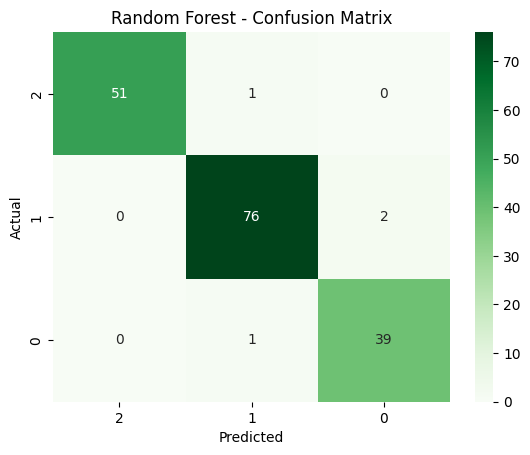

Adjusted Rand Index (ARI) Score for K-Means Clustering: 0.09578500363314402


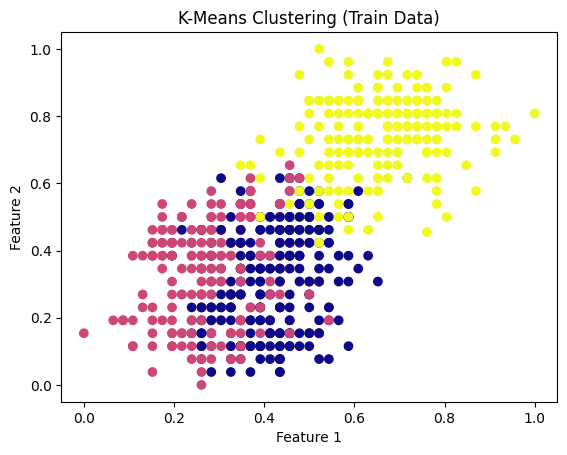

Comparison of the models:
Supervised Random Forest Accuracy: 0.9764705882352941
Unsupervised K-Means ARI: 0.09578500363314402


In [ ]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_norm, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_norm)

# Evaluation of the model
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=vehicle['class'].unique(), yticklabels=vehicle['class'].unique())
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- Unsupervised Learning Approach: K-Means Clustering ----

# Initialize and train a KMeans model (assuming 3 clusters for the 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred_kmeans = kmeans.fit_predict(X_train_norm)

# Evaluate clustering results with Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_train, y_pred_kmeans)
print(f"Adjusted Rand Index (ARI) Score for K-Means Clustering: {ari_score}")

# colors

labels = np.array(['van', 'car', 'bus'])
colors = [palette[labels[label]] for label in y_pred_kmeans]

# Crear gráfico de dispersión con colores personalizados
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_pred_kmeans, cmap='plasma')
plt.title("K-Means Clustering (Train Data)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ---- Comparison between supervised and unsupervised results ----

# For supervised, we already have the classification report and confusion matrix.
# For unsupervised, we used the ARI to compare clusters to the true labels.

print(f"Comparison of the models:")
print(f"Supervised Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Unsupervised K-Means ARI: {ari_score}")

##Interpretation of the confusion matrix values

### Confusion Matrix Breakdown:

- **Rows** represent the **Actual** classes (ground truth).
- **Columns** represent the **Predicted** classes (by the model).

### Labeling:
- **0:** Bus
- **1:** Car
- **2:** Van

### Matrix Values:
Each cell in the matrix corresponds to the count of predictions for a specific class combination. Let's break it down:

#### For the **Bus (Actual: 0) class**:
- **True positives (diagonal):** 39 instances were correctly predicted as bus.
- **False negatives (row total for bus but not predicted as bus):** 1 van and 0 car were incorrectly predicted as bus.

#### For the **Car (Actual: 1) class**:
- **True positives (diagonal):** 76 instances were correctly predicted as car.
- **False negatives (row total for car but not predicted as car):** 2 van instances were incorrectly predicted as car.
  
#### For the **Van (Actual: 2) class**:
- **True positives (diagonal):** 51 instances were correctly predicted as van.
- **False negatives (row total for van but not predicted as van):** 1 car instance and 0 bus instances were incorrectly predicted as van.

### Key Observations:
- The model has done a good job in predicting buses and cars, with a small number of misclassifications (only 1 or 2 instances per class).
- The **most significant errors** are between the **van** and **bus** classes, with 1 van being predicted as a bus.
- **Diagonal elements** represent correctly predicted values, while off-diagonal elements indicate misclassifications.
  
### General Conclusion:
- The Random Forest model performs very well, with the highest number of correct predictions and relatively few misclassifications.